# DoorDash Delivery Time Prediction

# 问题分析

用户从下单到收到食物的花费的时间有几个部分构成，可以由如下公式表示:
$$
T = T_p + T_s + T_d
$$

- $T$: Total time
- $T_p$: Place time
- $T_s$: Time in shop
- $T_d$: Delivery time 

$T_p$, $T_s$, $T_d$都是一个排队过程。排队过程的时间包括等待时间和处理时间。

$$
T_p = T_{pw} + T_{pp} \\
T_s = T_{sw} + T_{sp} \\
T_d = T_{dw} + T_{dp}
$$

- $T_{\cdot w}$: 等待时间 
- $T_{\cdot p}$: 处理时间 


# 数据

In [1]:
import pandas as pd
import numpy as np
str_cols = [
    'market_id',
    'created_at',
    'actual_delivery_time',
    'store_id',
    'store_primary_category',
    'order_protocol',
    'delivery_id'
]

def parse_datetime(dt):
    return pd.to_datetime(dt, utc=True).map(lambda x: x.tz_convert('US/Pacific'))

def load_dataset(name, predict=False):
    dtype = {c: str for c in str_cols}
    df = pd.read_csv(name, dtype=dtype)
    df.created_at = parse_datetime(df.created_at)
    if not predict:
        df.actual_delivery_time = parse_datetime(df.actual_delivery_time)
        df['delivery_duration'] = (df.actual_delivery_time - df.created_at) / np.timedelta64(1, 'm')
    for c in ['estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']:
        df[c] = df[c] / 60
    return df

df = load_dataset('historical_data.csv')
predict_df = load_dataset('predict_data.csv', predict=True)

In [2]:
df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,197421.000000
mean,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,5.142670,9.089316,48.470956
std,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,1.502328,3.655882,320.493482
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,1.683333
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,4.183333,6.366667,35.066667
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,4.183333,9.066667,44.333333
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,7.433333,11.700000,56.350000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,45.250000,34.800000,141947.650000


In [3]:
df.isnull().sum(axis=0) / df.shape[0]

market_id                                       0.004999
created_at                                      0.000000
actual_delivery_time                            0.000035
store_id                                        0.000000
store_primary_category                          0.024110
order_protocol                                  0.005040
total_items                                     0.000000
subtotal                                        0.000000
num_distinct_items                              0.000000
min_item_price                                  0.000000
max_item_price                                  0.000000
total_onshift_dashers                           0.082369
total_busy_dashers                              0.082369
total_outstanding_orders                        0.082369
estimated_order_place_duration                  0.000000
estimated_store_to_consumer_driving_duration    0.002664
delivery_duration                               0.000035
dtype: float64

In [4]:
predict_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,54778.000000,54778.000000,54778.000000,54778.000000,54778.000000,50145.000000,50145.000000,50145.000000,54778.000000,54767.000000
mean,3.227737,2715.758772,2.691902,683.757384,1166.795356,49.076179,43.515206,62.566756,5.135211,9.129423
std,2.557472,1897.919808,1.650204,538.496995,574.594726,37.594714,34.051339,56.378953,1.482298,3.674329
min,1.000000,0.000000,1.000000,-63.000000,0.000000,-1.000000,-4.000000,-9.000000,0.000000,0.000000
25%,2.000000,1420.000000,2.000000,299.000000,819.000000,19.000000,16.000000,19.000000,4.183333,6.416667
50%,3.000000,2220.000000,2.000000,595.000000,1095.000000,41.000000,36.000000,45.000000,4.183333,9.066667
75%,4.000000,3415.000000,3.000000,929.000000,1399.000000,71.000000,63.000000,91.000000,7.433333,11.716667
max,81.000000,29925.000000,19.000000,25040.000000,25142.000000,175.000000,169.000000,292.000000,18.250000,25.833333


In [5]:
predict_df.isnull().sum(axis=0) / predict_df.shape[0]

market_id                                       0.004564
created_at                                      0.000000
store_id                                        0.000000
store_primary_category                          0.024517
order_protocol                                  0.005166
total_items                                     0.000000
subtotal                                        0.000000
num_distinct_items                              0.000000
min_item_price                                  0.000000
max_item_price                                  0.000000
total_onshift_dashers                           0.084578
total_busy_dashers                              0.084578
total_outstanding_orders                        0.084578
estimated_order_place_duration                  0.000000
estimated_store_to_consumer_driving_duration    0.000201
delivery_id                                     0.000000
platform                                        0.000000
dtype: float64

In [6]:
df.created_at.min(), df.created_at.max()

(Timestamp('2014-10-18 22:24:15-0700', tz='US/Pacific'),
 Timestamp('2015-02-17 22:00:44-0800', tz='US/Pacific'))

In [7]:
predict_df.created_at.min(), predict_df.created_at.max()

(Timestamp('2015-02-18 06:50:28-0800', tz='US/Pacific'),
 Timestamp('2015-02-24 21:59:49-0800', tz='US/Pacific'))

In [8]:
df.nunique()

market_id                                            6
created_at                                      180985
actual_delivery_time                            178110
store_id                                          6743
store_primary_category                              74
order_protocol                                       7
total_items                                         57
subtotal                                          8368
num_distinct_items                                  20
min_item_price                                    2312
max_item_price                                    2652
total_onshift_dashers                              172
total_busy_dashers                                 159
total_outstanding_orders                           281
estimated_order_place_duration                      98
estimated_store_to_consumer_driving_duration      1336
delivery_duration                                 7134
dtype: int64

In [9]:
predict_df.nunique()

market_id                                           6
created_at                                      49941
store_id                                         5676
store_primary_category                             71
order_protocol                                      7
total_items                                        46
subtotal                                         6044
num_distinct_items                                 19
min_item_price                                   1729
max_item_price                                   1929
total_onshift_dashers                             175
total_busy_dashers                                172
total_outstanding_orders                          272
estimated_order_place_duration                      5
estimated_store_to_consumer_driving_duration     1241
delivery_id                                     54768
platform                                            3
dtype: int64

## Time Slot
考虑特征的时效性，将一天的时间划分成多个时段。目前采用等间隔划分。

In [10]:
TIME_SLOT_INVERTAL = 15

def date_to_time_slot(date, interval=TIME_SLOT_INVERTAL):
    return (date.hour * 60 + date.minute) // interval

df['hour'] = df.created_at.apply(lambda x: x.hour)
predict_df['hour'] = predict_df.created_at.apply(lambda x: x.hour)

df['day_of_week'] = df.created_at.apply(lambda x: x.dayofweek)
predict_df['day_of_week'] = predict_df.created_at.apply(lambda x: x.dayofweek)

df['time_slot'] = df.created_at.apply(date_to_time_slot)
predict_df['time_slot'] = predict_df.created_at.apply(date_to_time_slot)


<AxesSubplot:xlabel='day_of_week,time_slot'>

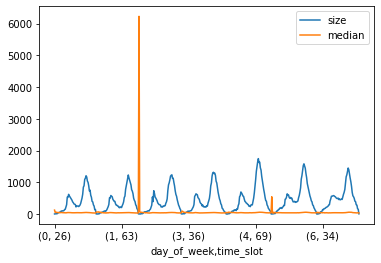

In [11]:
df.groupby(['day_of_week', 'time_slot'])['delivery_duration'].agg([np.size, np.median]).plot()

<AxesSubplot:xlabel='day_of_week,time_slot'>

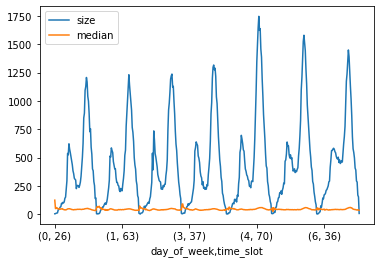

In [18]:
df[df.delivery_duration < 600].groupby(['day_of_week', 'time_slot'])['delivery_duration'].agg([np.size, np.median]).plot()

## Fix Invalid Data

In [19]:
def fix_invalid_data(df):
    df.loc[~(df.total_items >= 1), 'total_items'] = 1
    df.loc[~(df.num_distinct_items >= 1), 'num_distinct_items'] = 1
    df.loc[~(df.subtotal >= 0), 'subtotal'] = np.nan
    df.loc[~(df.min_item_price >= 0), 'min_item_price'] = 0
    df.loc[~(df.max_item_price >= 0), 'max_item_price'] = np.nan
    df.loc[~(df.total_onshift_dashers >= 0), 'total_onshift_dashers'] = np.nan
    df.loc[~(df.total_busy_dashers >= 0), 'total_busy_dashers'] = np.nan
    df.loc[~(df.total_outstanding_orders >= 0), 'total_outstanding_orders'] = np.nan
    df.loc[~(df.estimated_order_place_duration >= 0), 'estimated_order_place_duration'] = np.nan
    df.loc[~(df.estimated_store_to_consumer_driving_duration >= 0), 'estimated_store_to_consumer_driving_duration'] = np.nan

fix_invalid_data(df)
fix_invalid_data(predict_df)

df = df[df.delivery_duration < 600]


In [20]:
df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,hour,day_of_week,time_slot
count,197407.000000,197407.000000,197407.000000,197407.000000,197407.000000,181126.000000,181126.000000,181103.000000,197407.000000,196881.000000,197407.000000,197407.000000,197407.000000,197407.000000
mean,3.196396,2682.355322,2.670792,686.230600,1159.593049,44.812153,41.743549,58.062037,5.142656,9.089206,47.657259,16.109616,3.221563,65.941932
std,2.666625,1823.145953,1.630291,522.048554,558.425077,34.523759,32.142938,52.656755,1.502324,3.655937,18.772022,3.306018,1.978319,13.178464
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.683333,6.000000,0.000000,26.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,4.183333,6.366667,35.066667,13.000000,2.000000,55.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,4.183333,9.066667,44.333333,17.000000,3.000000,70.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,7.433333,11.700000,56.350000,19.000000,5.000000,76.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,45.250000,34.800000,472.083333,23.000000,6.000000,92.000000


In [23]:
predict_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,hour,day_of_week,time_slot
count,54778.000000,54778.000000,54778.000000,54778.000000,54778.000000,50143.000000,50135.000000,50132.000000,54778.000000,54767.000000,54778.000000,54778.000000,54778.000000
mean,3.227737,2715.758772,2.691902,683.759338,1166.795356,49.078176,43.524284,62.583859,5.135211,9.129423,16.054036,3.292983,65.712458
std,2.557472,1897.919808,1.650204,538.494430,574.594726,37.594133,34.048664,56.376246,1.482298,3.674329,3.291560,1.986633,13.136132
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,26.000000
25%,2.000000,1420.000000,2.000000,299.000000,819.000000,19.000000,16.000000,19.000000,4.183333,6.416667,13.000000,2.000000,54.000000
50%,3.000000,2220.000000,2.000000,595.000000,1095.000000,41.000000,36.000000,45.000000,4.183333,9.066667,17.000000,4.000000,70.000000
75%,4.000000,3415.000000,3.000000,929.000000,1399.000000,71.000000,63.000000,91.000000,7.433333,11.716667,18.000000,5.000000,75.000000
max,81.000000,29925.000000,19.000000,25040.000000,25142.000000,175.000000,169.000000,292.000000,18.250000,25.833333,23.000000,6.000000,92.000000


# Model

## 损失函数
- 问题设定
 -  Order lateness / underprediction of delivery time is of particular concern as past experiments suggest that underestimating delivery time is roughly twice as costly as overestimating it. 
 - Orders that are very early / late are also much worse than those that are only slightly early / late.

为了满足问题设定和鲁棒性要求，选择的损失函数如下:
$$
\begin{align}
loss(real, pred) &= 
\begin{cases}
2 * (real - pred) & \text{if real - pred \ge 0} \\
pred - real & \text{else}
\end{cases} \\
&= 1.5 |real - pred| + 0.5 * (real - pred)
\end{align}
$$

In [29]:
import scipy as sp

def loss_func(real, pred):
    d = real - pred
    return 1.5 * np.abs(d) + 0.5 * d

def metrics(real, pred):
    return sp.stats.describe(loss_func(real, pred))

## 数据集划分

In [37]:
df.created_at.min(), df.created_at.max(), predict_df.created_at.min(), predict_df.created_at.max()

(Timestamp('2015-01-21 07:22:03-0800', tz='US/Pacific'),
 Timestamp('2015-02-17 22:00:44-0800', tz='US/Pacific'),
 Timestamp('2015-02-18 06:50:28-0800', tz='US/Pacific'),
 Timestamp('2015-02-24 21:59:49-0800', tz='US/Pacific'))

## Baseline

首先采用xgboost建立baseline模型. 

由于$|x|$一阶，二阶不可导，我们采用$h(x; \theta)$近似.
$$
h(x; \theta) = \int_0^x{\frac{x}{\sqrt{1+{(\frac{x}{\theta})}^2}}} dx
$$

为了减少函数近似带来的误差，我们可以对xgboost的输出进行修正。

In [28]:
def huber_approx_obj(y_true, y_pred, theta):
    d = y_pred - y_true
    scale = 1 + (d / theta) ** 2
    scale_sqrt = np.sqrt(scale)
    grad = d / scale_sqrt
    hess = 1 / scale / scale_sqrt
    return grad, hess

def approx_loss_obj(y_true, y_pred, theta=1.0):
    grad, hess = huber_approx_obj(y_true, y_pred, theta)
    return 1.5 * grad + 0.5, 1.5 * hess

In [34]:
import xgboost as xgb
import cvxpy as cp

def baseline(X, y,
             obj=approx_loss_obj, learning_rate=0.01, max_depth=4):
    model = xgb.XGBRegressor(
        learning_rate=learning_rate,
        max_depth=max_depth,
        objective=obj,
    )
    model.fit(X, np.expand_dims(y, axis=1))
    
    # ajust xgboost predict
    y_pred = model.predict(X)
    a = cp.Variable(1)
    b = cp.Variable(1)

    d = y - (a * y_pred + b)
    cost = cp.sum(1.5 * cp.abs(d) + 0.5 * d)
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()
    return model, a.value, b.value

def baseline_predict(X, model, a=1.0, b=0.0):
    return a * model.predict(X) + b
